1. Generate synthetic data with 4 centers using make_blobs and apply K-Means clustering. Visualize using a
scatter plot

In [1]:
from sklearn.datasets import make_blobs

In [3]:
x,y=make_blobs(
    n_samples=500,
    centers=4,
    n_features=2,
    random_state=42,
)

In [8]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4,random_state=42)
kmeans.fit(x)

,n_clusters,4
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [9]:
labels=kmeans.labels_
centers=kmeans.cluster_centers_

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

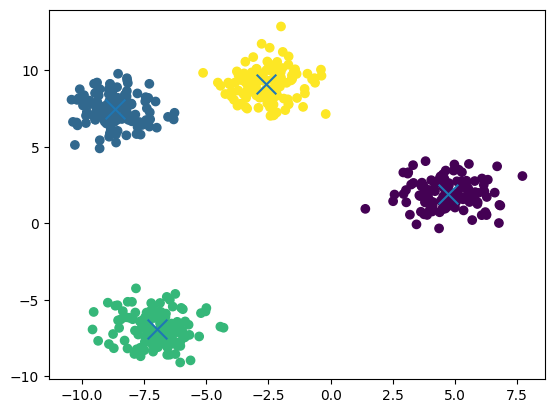

In [13]:
plt.scatter(x[:,0],x[:,1],c=labels)
plt.scatter(centers[:,0],centers[:,1],marker='x',s=200)

2 Load the Iris dataset and use Agglomerative Clustering to group the data into 3 clusters. Display the first 10
predicted labels

In [1]:
from sklearn.datasets import load_iris

In [2]:
data=load_iris()

In [4]:
x=data.data

In [5]:
from sklearn.cluster import AgglomerativeClustering

In [7]:
agg_clustering=AgglomerativeClustering(
    n_clusters=3,
    linkage='ward'
)

In [8]:
labels=agg_clustering.fit_predict(x)

In [9]:
print(labels[:10])

[1 1 1 1 1 1 1 1 1 1]


3 Generate synthetic data using make_moons and apply DBSCAN. Highlight outliers in the plot

In [10]:
from sklearn.datasets import make_moons

In [11]:
x,y=make_moons(n_samples=300,noise=0.08,random_state=42)

In [32]:

from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.1,min_samples=5)
labels=dbscan.fit_predict(x)


In [33]:
outliers=labels==-1

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

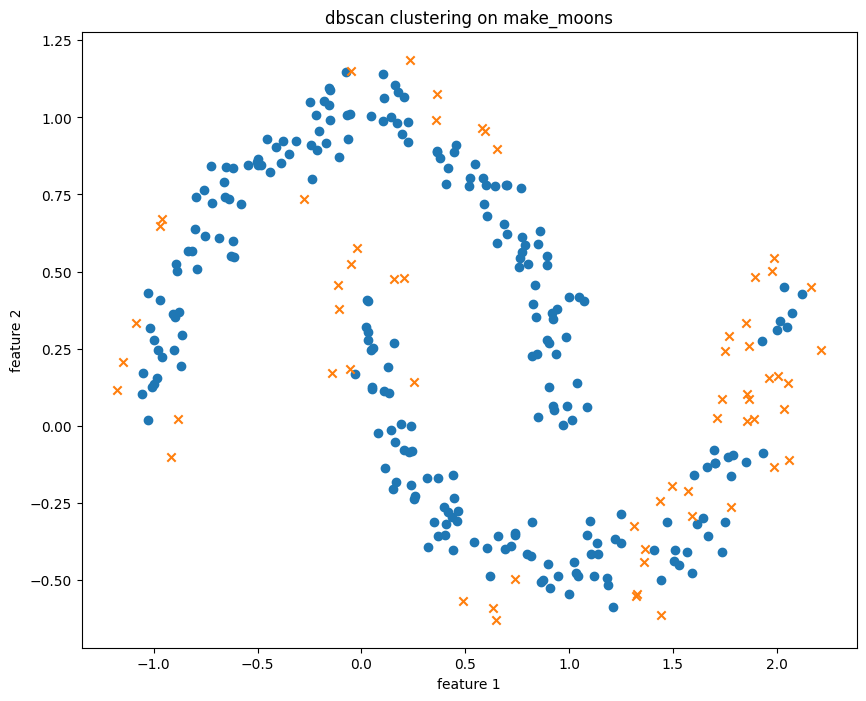

In [39]:
plt.figure(figsize=(10,8))
plt.scatter(x[~outliers,0],x[~outliers,1],marker='o')
plt.scatter(x[outliers,0],x[outliers,1],marker='x')
plt.title("dbscan clustering on make_moons")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

3 Load the Wine dataset and apply K-Means clustering after standardizing the features. Print the size of each
cluster

In [41]:
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler


In [42]:
wine=load_wine()
x=wine.data

In [43]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [44]:
from sklearn.cluster import KMeans

In [47]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit(x_scaled)

In [49]:
predict_labels=labels.predict(x_scaled)

In [51]:
import numpy as np
predict_labels,counts=np.unique(predict_labels,return_counts=True)

In [52]:
for cluster,size in zip(predict_labels,counts):
    print(f"cluster{cluster}:{size} samples")

cluster0:65 samples
cluster1:51 samples
cluster2:62 samples


 4 Use make_circles to generate synthetic data and cluster it using DBSCAN. Plot the result

In [53]:
from sklearn.datasets import make_circles

In [54]:
x,y=make_circles(n_samples=300,noise=0.05,factor=0.5,random_state=42)

In [55]:
from sklearn.cluster import DBSCAN

In [60]:
dbscan=DBSCAN(eps=0.1,min_samples=5)
labels=dbscan.fit_predict(x)

In [61]:
outliers=labels==-1

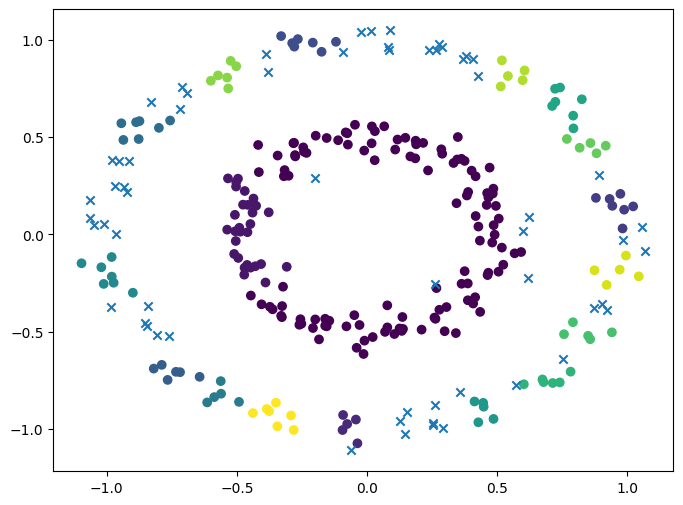

In [62]:
plt.figure(figsize=(8,6))


plt.scatter(x[outliers,0],x[outliers,1],marker='x')

5 Load the Breast Cancer dataset, apply MinMaxScaler, and use K-Means with 2 clusters. Output the cluster
centroids

In [63]:
from sklearn.datasets import load_breast_cancer

In [64]:
cancer=load_breast_cancer()

In [65]:
x=cancer.data

In [66]:
feature_names=cancer.feature_names

In [67]:
feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [68]:

from sklearn.preprocessing import MinMaxScaler

In [80]:
scaler=MinMaxScaler()
x_scaled=scaler.fit_transform(x)

In [81]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans.fit(x_scaled)

,n_clusters,2
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [82]:
centroids=kmeans.cluster_centers_

In [83]:
centroids

array([[0.50483563, 0.39560329, 0.50578661, 0.36376576, 0.46988732,
        0.42226302, 0.41838662, 0.46928035, 0.45899738, 0.29945886,
        0.19093085, 0.19112073, 0.17903433, 0.13086432, 0.18017962,
        0.25890126, 0.12542475, 0.30942779, 0.190072  , 0.13266975,
        0.48047448, 0.45107371, 0.4655302 , 0.31460597, 0.49868817,
        0.36391461, 0.39027292, 0.65827197, 0.33752296, 0.26041387],
       [0.25535358, 0.28833455, 0.24696416, 0.14388369, 0.35743076,
        0.18019471, 0.10344776, 0.1306603 , 0.34011829, 0.25591606,
        0.06427485, 0.18843043, 0.05975663, 0.02870108, 0.18158628,
        0.13242941, 0.05821528, 0.18069336, 0.17221057, 0.08403996,
        0.2052406 , 0.32069002, 0.19242138, 0.09943446, 0.3571115 ,
        0.14873935, 0.13142287, 0.26231363, 0.22639412, 0.15437354]])

In [84]:
import pandas as pd
centroids_df=pd.DataFrame(centroids ,columns=feature_names)

In [87]:
centroids_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,0.504836,0.395603,0.505787,0.363766,0.469887,0.422263,0.418387,0.46928,0.458997,0.299459,...,0.480474,0.451074,0.465530,0.314606,0.498688,0.363915,0.390273,0.658272,0.337523,0.260414
1,0.255354,0.288335,0.246964,0.143884,0.357431,0.180195,0.103448,0.13066,0.340118,0.255916,...,0.205241,0.320690,0.192421,0.099434,0.357112,0.148739,0.131423,0.262314,0.226394,0.154374


6  Generate synthetic data using make_blobs with varying cluster standard deviations and cluster with
DBSCAN

In [88]:
from sklearn.datasets import make_blobs

In [89]:
x,y=make_blobs(
    n_samples=1000,
    centers=3,
    cluster_std=[0.2,0.6,1.2],
    random_state=42
)


In [90]:
dbscan=DBSCAN(eps=0.5,min_samples=10)
labels=dbscan.fit_predict(x)

In [91]:
outliers=labels==-1

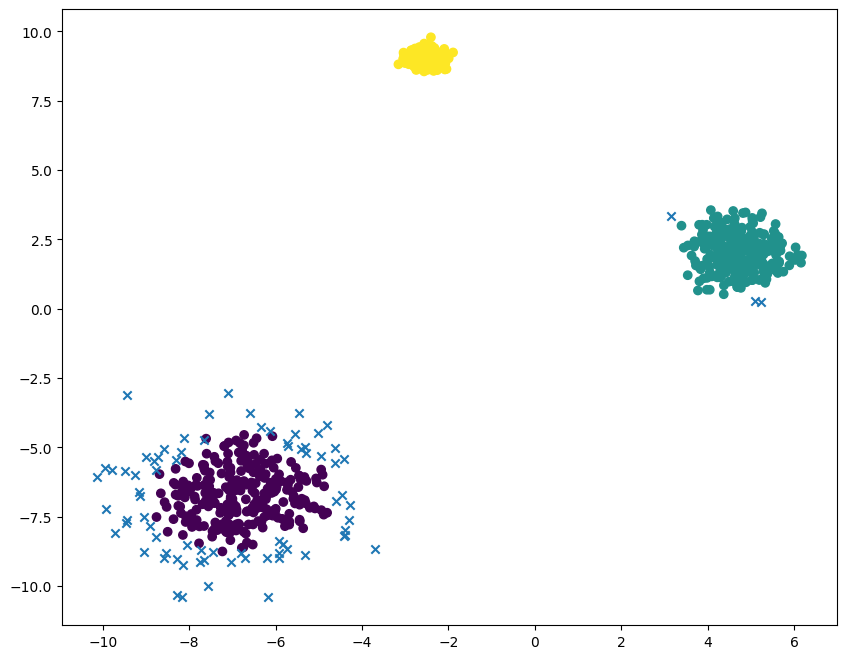

In [96]:
plt.figure(figsize=(10,8))
plt.scatter(
    x[~outliers,0],
    x[~outliers,1],
    c=labels[~outliers],
    marker='o',
    label='Cluster'
)
plt.scatter(
    x[outliers,0],
    x[outliers,1],
    marker='x',
    label='Outliers'
)

7 Load the Digits dataset, reduce it to 2D using PCA, and visualize clusters from K-Means

In [98]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

In [99]:
digits=load_digits()
x=digits.data
y=digits.target

In [100]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [101]:
y

array([0, 1, 2, ..., 8, 9, 8], shape=(1797,))

In [102]:
from sklearn.preprocessing import StandardScaler

In [103]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [104]:
pca=PCA(n_components=2,random_state=42)
x_pca=pca.fit_transform(x_scaled)

In [105]:
kmeans=KMeans(n_clusters=10,random_state=42)
labels=kmeans.fit_predict(x_pca)

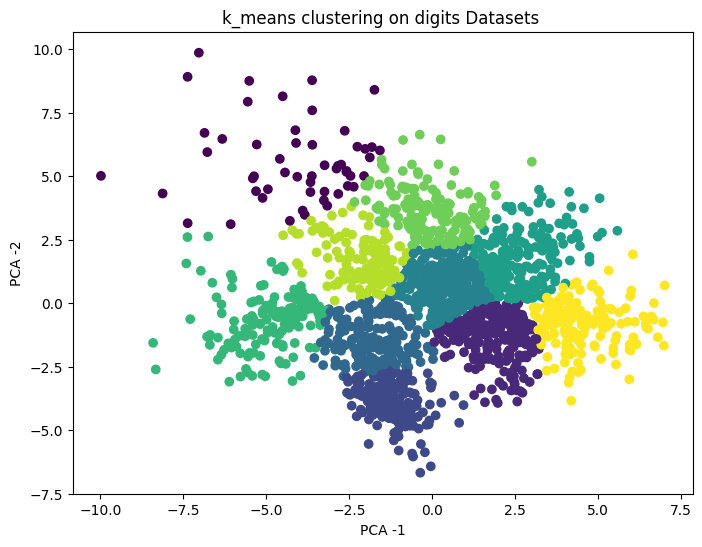

In [106]:
plt.figure(figsize=(8,6))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,marker='o')
plt.title("k_means clustering on digits Datasets ")
plt.xlabel("PCA -1")
plt.ylabel("PCA -2")
plt.show()

7 Create synthetic data using make_blobs and evaluate silhouette scores for k = 2 to 5. Display as a bar chart

In [107]:
from sklearn.datasets import make_blobs

In [133]:
x,y=make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

In [134]:
from sklearn.metrics import silhouette_score

In [135]:
k_values=range(2,6)
silhoutte_scores=[]
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(x)
    score=silhouette_score(x,labels)
    silhoutte_scores.append(score)

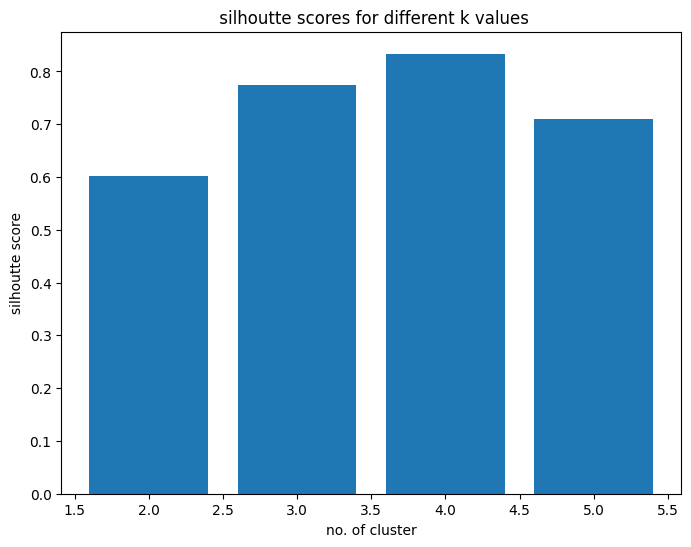

In [136]:
plt.figure(figsize=(8,6))
plt.bar(k_values,silhoutte_scores)
plt.xlabel("no. of cluster")
plt.ylabel("silhoutte score")
plt.title(" silhoutte scores for different k values")
plt.show()

8  Load the Iris dataset and use hierarchical clustering to group data. Plot a dendrogram with average linkage

In [137]:
from sklearn.datasets import load_iris

In [140]:
data=load_iris()
x=data.data

In [142]:
from scipy.cluster.hierarchy import dendrogram,linkage

In [149]:
z=linkage(x,method='ward')

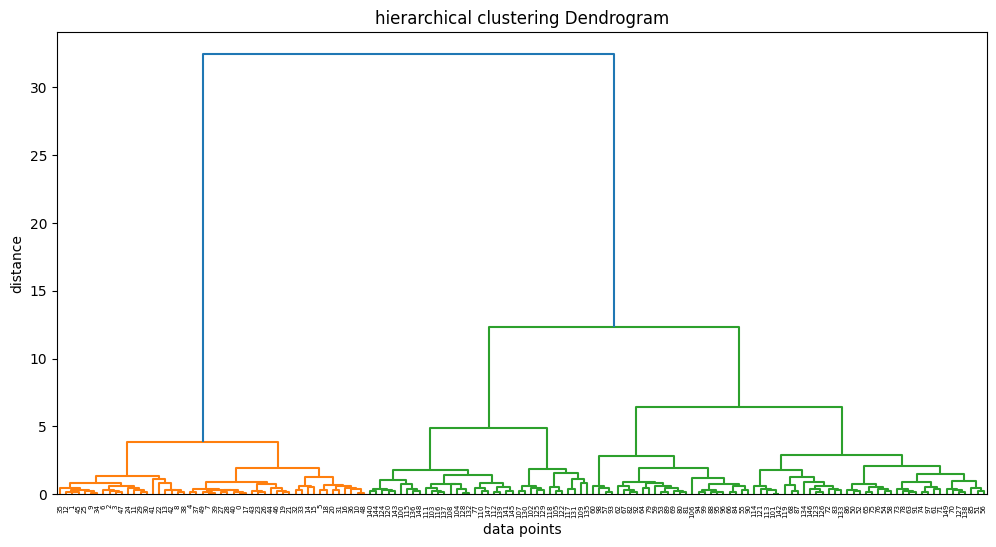

In [150]:
plt.figure(figsize=(12,6))
dendrogram(z)
plt.title("hierarchical clustering Dendrogram")
plt.xlabel('data points')
plt.ylabel('distance')
plt.show()
          

9 Generate synthetic data with overlapping clusters using make_blobs, then apply K-Means and visualize with
decision boundaries

In [151]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [184]:
x,y=make_blobs(
    n_samples=1000,
    centers=3,
    cluster_std=2.5,
    random_state=42
)


In [185]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=3,random_state=42)

In [186]:
labels=kmeans.fit_predict(x)

In [187]:
x_min,x_max=x[:,0].min()-1,x[:,0].max()+1
y_min,y_max=x[:,1].min()-1,x[:,1].max()+1

xx,yy=np.meshgrid(
    np.linspace(x_min,x_max,500),
    np.linspace(y_min,y_max,500)
)

In [188]:
z=kmeans.predict(np.c_[xx.ravel(),yy.ravel()])
z=z.reshape(xx.shape)

/var/folders/lt/92vvt3256lg5xyfxxq3r52zw0000gn/T/ipykernel_97518/3928140515.py:6: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(


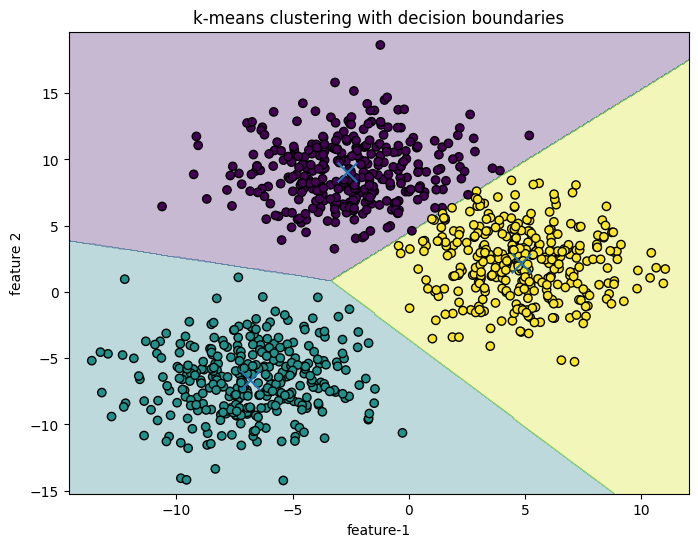

In [189]:
plt.figure(figsize=(8,6))
plt.contourf(xx,yy,z,alpha=0.3)
plt.scatter(x[:,0],x[:,1],c=labels,edgecolor='k')


plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='x',
    s=200,
    edgecolor='k'
)
plt.title("k-means clustering with decision boundaries")
plt.xlabel("feature-1")
plt.ylabel("feature 2")
plt.show()

 10 Load the Digits dataset and apply DBSCAN after reducing dimensions with t-SNE. Visualize the results

In [190]:
from sklearn.datasets import load_digits

In [191]:
data=load_digits()
x=data.data
y=data.target

In [192]:
x

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64))

In [193]:
from sklearn.preprocessing import StandardScaler

In [194]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [195]:
x_scaled

array([[ 0.        , -0.33501649, -0.04308102, ..., -1.14664746,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  0.54856067,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -1.09493684, ...,  1.56568555,
         1.6951369 , -0.19600752],
       ...,
       [ 0.        , -0.33501649, -0.88456568, ..., -0.12952258,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649, -0.67419451, ...,  0.8876023 ,
        -0.5056698 , -0.19600752],
       [ 0.        , -0.33501649,  1.00877481, ...,  0.8876023 ,
        -0.26113572, -0.19600752]], shape=(1797, 64))

In [196]:
from sklearn.manifold import TSNE

In [197]:
tsne=TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    random_state=42
)

In [199]:
x_tsne=tsne.fit_transform(x_scaled)

In [200]:
x_tsne

array([[-46.15402  , -31.244461 ],
       [-16.073278 ,  11.068382 ],
       [ -1.3351135,  18.922209 ],
       ...,
       [  7.262864 ,   6.9393425],
       [ 26.713448 , -15.224491 ],
       [ 17.061935 ,  11.186256 ]], shape=(1797, 2), dtype=float32)

In [201]:
from sklearn.cluster import DBSCAN

In [202]:
dbscan=DBSCAN(eps=3.5,min_samples=10)
labels=dbscan.fit_predict(x_tsne)

In [203]:
outliers=labels==-1

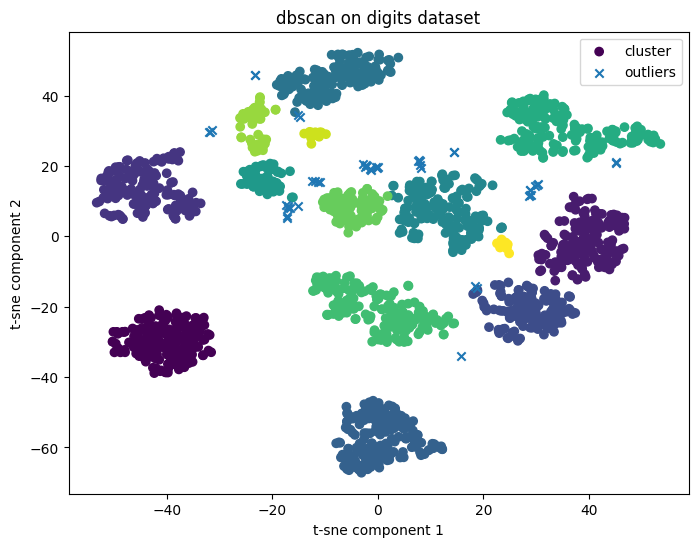

In [208]:
plt.figure(figsize=(8,6))
plt.scatter(
    x_tsne[~outliers,0],
    x_tsne[~outliers,1],
    c=labels[~outliers],
    marker='o',
    label='cluster'
)
plt.scatter(
    x_tsne[outliers,0],
    x_tsne[outliers,1],
    marker='x',
    label='outliers'
)
plt.title("dbscan on digits dataset")
plt.xlabel("t-sne component 1")
plt.ylabel("t-sne component 2")
plt.legend()
plt.show()

11. Generate synthetic data using make_blobs and apply Agglomerative Clustering with complete linkage. Plot
the result

In [209]:
from sklearn.datasets import make_blobs

In [210]:
x,y=make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=1.0,
    random_state=42
)


In [211]:
from sklearn.cluster import AgglomerativeClustering

In [221]:
agg=AgglomerativeClustering(
    n_clusters=3,
    linkage='complete'
)
labels=agg.fit_predict(x)

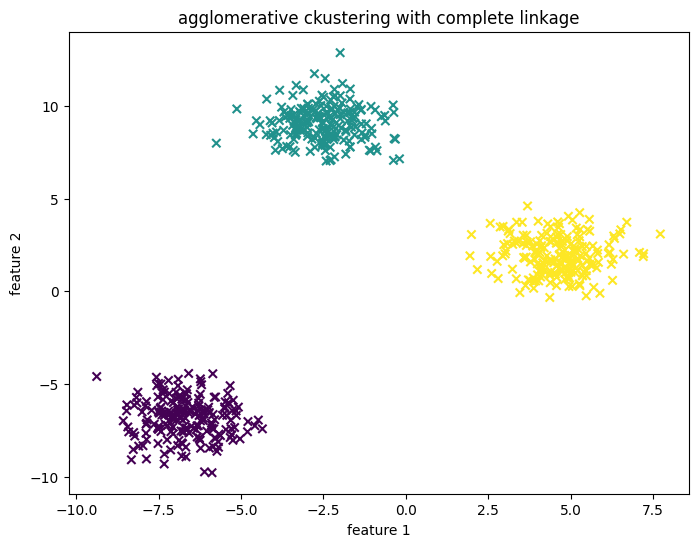

In [229]:
# plot the clusterred data

plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,marker='x')
plt.title("agglomerative ckustering with complete linkage")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.show()

12  Load the Breast Cancer dataset and compare inertia values for K = 2 to 6 using K-Means. Show results in a
line plot

In [231]:
from sklearn.datasets import load_breast_cancer

In [232]:
data=load_breast_cancer()

In [233]:
x=data.data

In [234]:
from sklearn.preprocessing import StandardScaler

In [235]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [238]:
k_values=range(2,7)

inertia_values=[]

In [239]:
from sklearn.cluster import KMeans
for k in k_values:
    kmeans=KMeans(n_clusters=k,random_state=42)
    kmeans.fit(x_scaled)
    inertia_values.append(kmeans.inertia_)

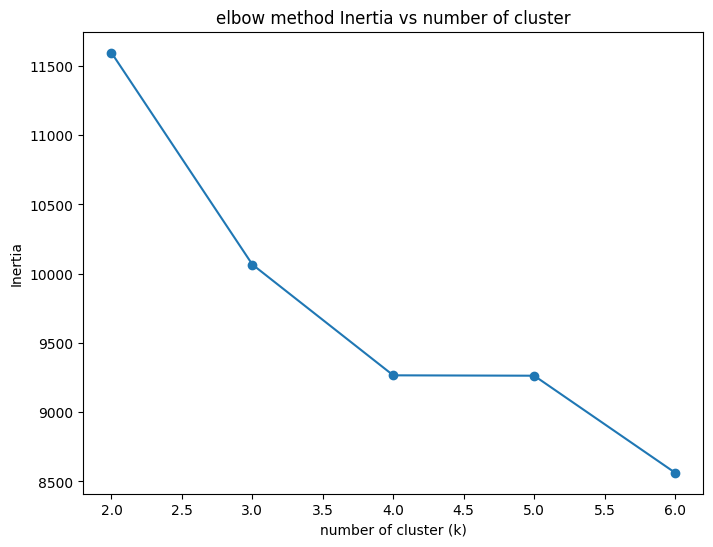

In [240]:
plt.figure(figsize=(8,6))
plt.plot(k_values,inertia_values,marker='o')
plt.xlabel("number of cluster (k)")
plt.ylabel("Inertia")
plt.title("elbow method Inertia vs number of cluster")
plt.show()

13 Generate synthetic concentric circles using make_circles and cluster using Agglomerative Clustering with
single linkage

In [241]:
from sklearn.datasets import make_circles

In [242]:
x,y=make_circles(
    n_samples=1000,
    noise=0.05,
    factor=0.5,
    random_state=42
)

In [244]:
from sklearn.cluster import AgglomerativeClustering

In [256]:
agg=AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)

In [257]:
labels=agg.fit_predict(x)

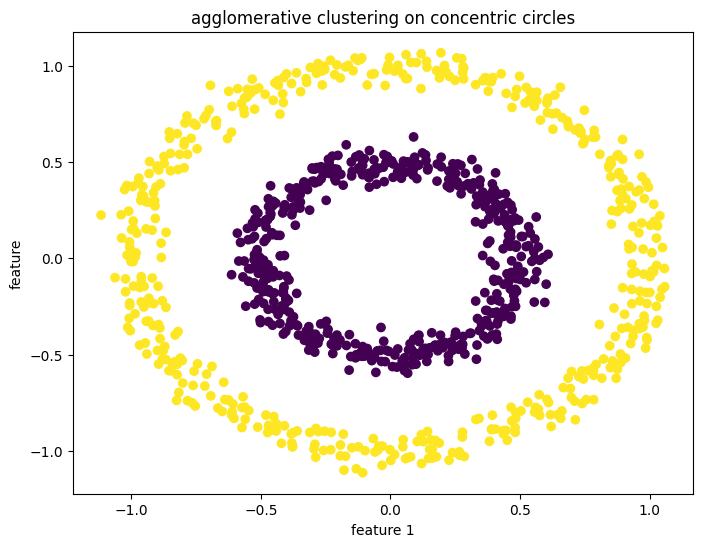

In [258]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,marker='o')
plt.title("agglomerative clustering on concentric circles")
plt.xlabel("feature 1")
plt.ylabel("feature")
plt.show()

14 Use the Wine dataset, apply DBSCAN after scaling the data, and count the number of clusters (excluding
noise

In [259]:
from sklearn.datasets import load_wine

In [267]:
data=load_wine()
x=data.data

In [268]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [269]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [270]:
dbscan=DBSCAN(eps=1.5,min_samples=5)
labels=dbscan.fit_predict(x_scaled)

In [271]:
unique_labels=set(labels)

In [272]:
unique_labels

{np.int64(-1)}

In [278]:
num_clusters=len(unique_labels -{-1})

In [280]:
print(num_clusters)

0


15  Generate synthetic data with make_blobs and apply KMeans. Then plot the cluster centers on top of the
data points 

In [282]:
from sklearn.datasets import make_blobs

In [283]:
x,y=make_blobs(
    n_samples=600,
    centers=3,
    cluster_std=1.0,
    random_state=42
)


In [284]:
from sklearn.cluster import KMeans

In [286]:
kmeans=KMeans(n_clusters=3,random_state=42)
labels=kmeans.fit_predict(x)

In [287]:
centers=kmeans.cluster_centers_

In [288]:
centers

array([[-2.51760288,  9.04764025],
       [-6.68168628, -6.81047379],
       [ 4.5923149 ,  1.95045129]])

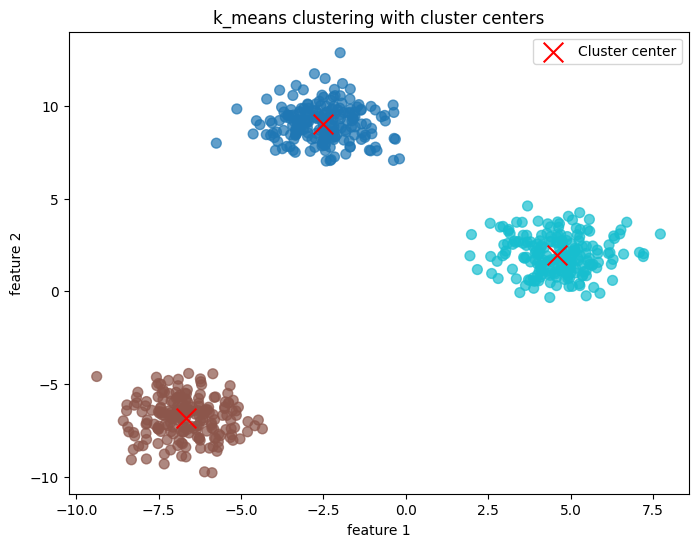

In [293]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='tab10',s=50,alpha=0.7)
plt.scatter(
    centers[:,0],
    centers[:,1],
    marker='x',
    s=200,
    c='red',
   
    label='Cluster center'
)
plt.title("k_means clustering with cluster centers")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

16  Load the Iris dataset, cluster with DBSCAN, and print how many samples were identified as noise

In [294]:
from sklearn.datasets import load_iris

In [295]:
data=load_iris()
x=data.data

In [297]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [298]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [299]:
dbscan=DBSCAN(eps=0.8,min_samples=5)
labels=dbscan.fit_predict(x_scaled)


In [301]:
import numpy as np
num_noise=np.sum(labels==-1)
print(f"number of noise samples identified is : {num_noise}")

number of noise samples identified is : 4


16 Generate synthetic non-linearly separable data using make_moons, apply K-Means, and visualize the
clustering result

In [302]:
from sklearn.datasets import make_moons

In [303]:
x,y =make_moons(
    n_samples=1000,
    noise=0.08,
    random_state=42
)


In [304]:
from sklearn.cluster import KMeans

In [305]:
kmeans=KMeans(n_clusters=2,random_state=42)
labels=kmeans.fit_predict(x)

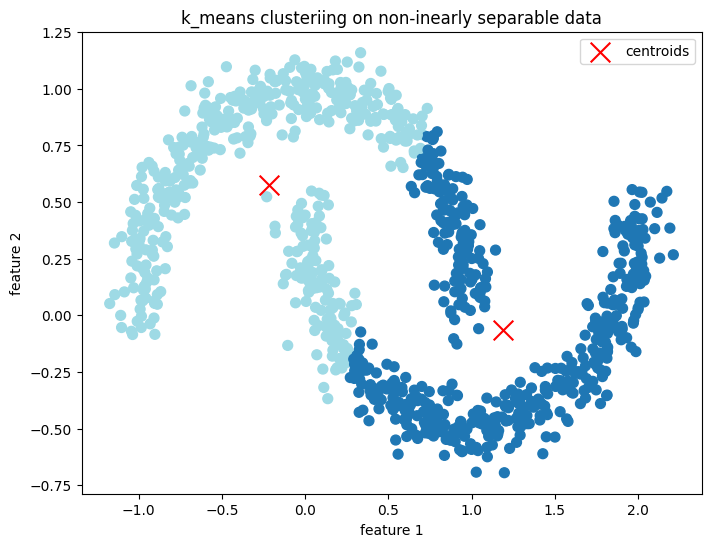

In [308]:
plt.figure(figsize=(8,6))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='tab20',s=50)
plt.scatter(
    kmeans.cluster_centers_[:,0],
    kmeans.cluster_centers_[:,1],
    marker='x',
    s=200,
    c='red',
    label='centroids'
)
plt.title("k_means clusteriing on non-inearly separable data")
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.legend()
plt.show()

17 Load the Digits dataset, apply PCA to reduce to 3 components, then use KMeans and visualize with a 3D
scatter plot.

In [310]:
from sklearn.datasets import load_digits

In [312]:
data=load_digits()
x=digits.data

In [313]:
from sklearn.preprocessing import StandardScaler

In [314]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [316]:
from sklearn.decomposition import PCA

In [317]:
pca=PCA(n_components=3,random_state=42)
x_pca=pca.fit_transform(x_scaled)

In [318]:
kmeans=KMeans(n_clusters=10,random_state=42)
labels=kmeans.fit_predict(x_pca)

In [319]:
from mpl_toolkits.mplot3d import Axes3D

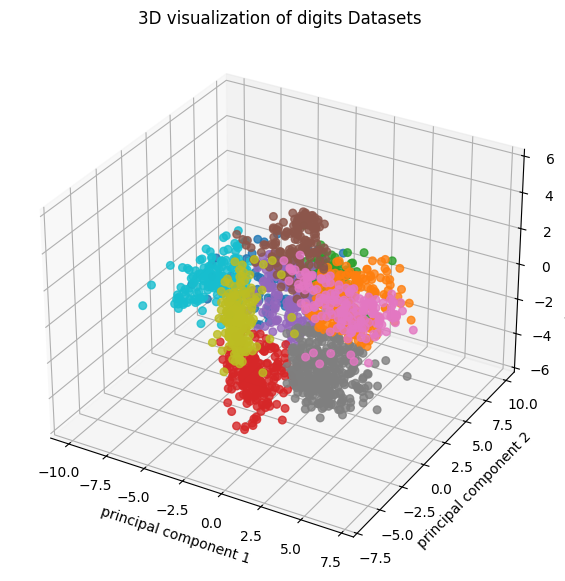

In [320]:
fig=plt.figure(figsize=(9,7))
ax=fig.add_subplot(111,projection='3d')

scatter=ax.scatter(
    x_pca[:,0],
    x_pca[:,1],
    x_pca[:,2],
    c=labels,
    cmap='tab10',
    s=30,
    alpha=0.8
)

ax.set_title("3D visualization of digits Datasets")
ax.set_xlabel("principal component 1")
ax.set_ylabel("principal component 2")
ax.set_zlabel("principal component 3")
plt.show()

 18 Generate synthetic blobs with 5 centers and apply KMeans. Then use silhouette_score to evaluate the
clustering

In [321]:
from sklearn.datasets import make_blobs

In [322]:
x,y=make_blobs(
    n_samples=1000,
    centers=5,
    cluster_std=1.0,
    random_state=42
)

In [323]:
from sklearn.cluster import KMeans

In [324]:
kmeans=KMeans(n_clusters=5,random_state=42)
labels=kmeans.fit_predict(x)

In [326]:
from sklearn.metrics import silhouette_score

In [328]:
score=silhouette_score(x,labels)
print("silhoutte score:", score)

silhoutte score: 0.6779388924748059


19 Load the Breast Cancer dataset, reduce dimensionality using PCA, and apply Agglomerative Clustering.
Visualize in 2D

In [329]:
from sklearn.datasets import load_breast_cancer

In [330]:
data=load_breast_cancer()

In [331]:
x=data.data

In [332]:
from sklearn.decomposition import PCA

In [333]:
pca=PCA(n_components=2,random_state=42)
x_pca=pca.fit_transform(x)

In [334]:
from sklearn.cluster import AgglomerativeClustering

In [338]:
agg=AgglomerativeClustering(
    n_clusters=2,
    linkage='single'
)
labels=agg.fit_predict(x_pca)

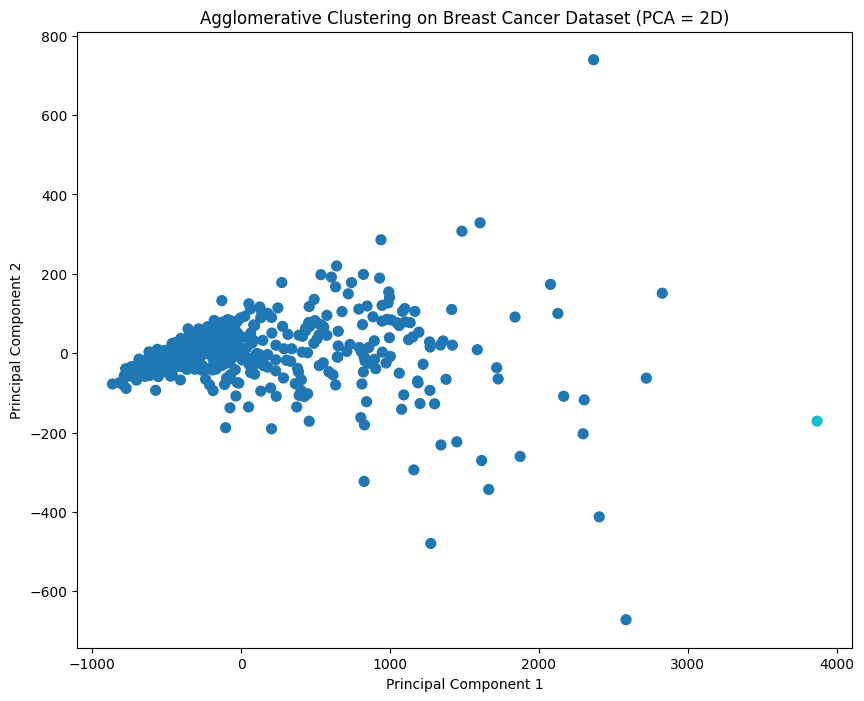

In [342]:
plt.figure(figsize=(10,8))
plt.scatter(x_pca[:,0],x_pca[:,1],c=labels,cmap='tab10',s=50)
plt.title("Agglomerative Clustering on Breast Cancer Dataset (PCA = 2D)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.show()

21 Generate noisy circular data using make_circles and visualize clustering results from KMeans and DBSCAN
side-by-side

In [344]:
from sklearn.datasets import make_circles

In [345]:
x,y =make_circles(
    n_samples=600,
    noise=0.08,
    factor=0.5,
    random_state=42
)


In [346]:
from sklearn.preprocessing import StandardScaler

In [347]:
x_scaled=StandardScaler().fit_transform(x)

In [348]:
from sklearn.cluster import KMeans

In [354]:
kmeans=KMeans(n_clusters=2,random_state=42)
kmeans_labels=kmeans.fit_predict(x_scaled)

In [366]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.03,min_samples=5)
labels=dbscan.fit_predict(x_scaled)

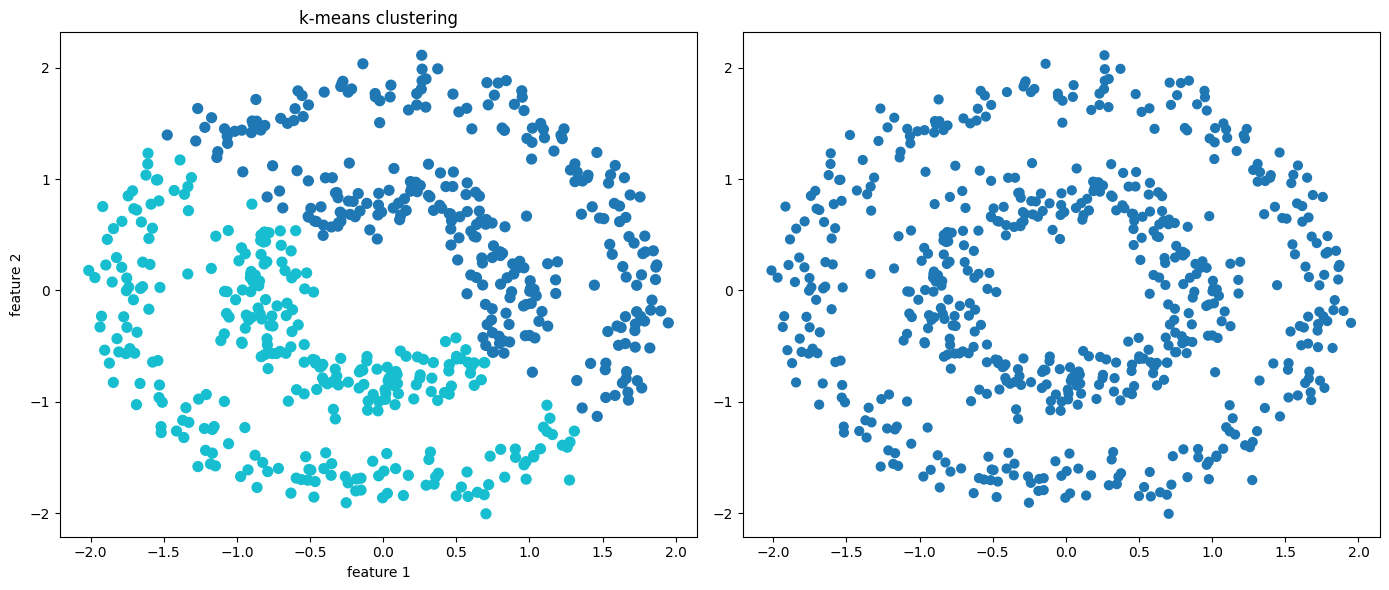

In [367]:
fig,axes=plt.subplots(1,2,figsize=(14,6))
axes[0].scatter(x_scaled[:,0],x_scaled[:,1],c=kmeans_labels,cmap='tab10',s=50)
axes[0].set_title("k-means clustering")
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")

axes[1].scatter(x_scaled[:, 0], x_scaled[:, 1], c=labels, cmap='tab20', s=40)
plt.tight_layout()
plt.show()

22  Load the Iris dataset and plot the Silhouette Coefficient for each sample after KMeans clustering

In [368]:
from sklearn.datasets import load_iris

In [369]:
data=load_iris()

In [370]:
x=data.data

In [374]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score,silhouette_samples


In [375]:
x_scaled=StandardScaler().fit_transform(x)

In [377]:
kmeans=KMeans(n_clusters=3,random_state=42)

In [378]:
labels=kmeans.fit_predict(x_scaled)

In [394]:
silhoutte_vals=silhouette_samples(x_scaled,labels)
avg_silhoutte=silhouette_score(x_scaled,labels)
                              

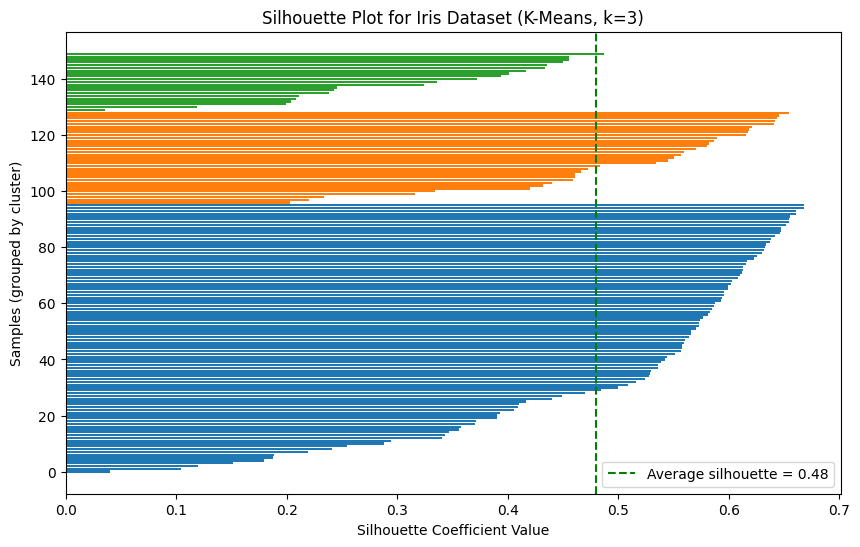

In [418]:
y_lower=0
plt.figure(figsize=(10,6))

for cluster in range(3):
    cluster_silhoutte_vals=silhoutte_vals[labels==cluster]
    cluster_silhoutte_vals.sort()

    y_upper =y_lower+len(cluster_silhoutte_vals)
   
    plt.barh(
        range(y_lower,y_upper),
        cluster_silhoutte_vals,
        edgecolor='none'
    )
    
    
    y_lower=y_upper
   
plt.axvline(avg_silhoutte, linestyle='--', color='green',
            label=f'Average silhouette = {avg_silhoutte:.2f}')

plt.xlabel("Silhouette Coefficient Value")
plt.ylabel("Samples (grouped by cluster)")
plt.title("Silhouette Plot for Iris Dataset (K-Means, k=3)")
plt.legend()
plt.show()
    

In [401]:
y_upper

21

In [404]:
y_lower

150

23 Generate synthetic data using make_blobs and apply Agglomerative Clustering with 'average' linkage.
Visualize clusters

In [419]:
from sklearn.datasets import make_blobs
x,y=make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=1.0,
    random_state=42
)

In [424]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler

In [428]:
x=StandardScaler().fit_transform(x)

In [430]:
agg=AgglomerativeClustering(
    n_clusters=4,
    linkage='average'
)

In [431]:
labels=agg.fit_predict(x)

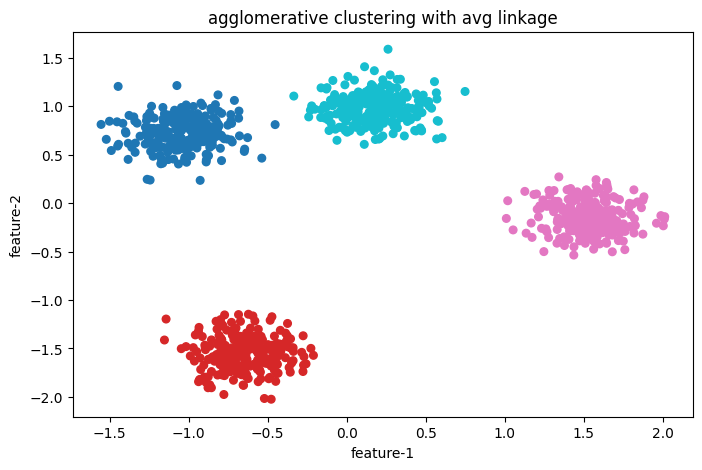

In [437]:
plt.figure(figsize=(8,5))
plt.scatter(x[:,0],x[:,1],c=labels,cmap='tab10',s=30)
plt.title("agglomerative clustering with avg linkage")
plt.xlabel("feature-1")
plt.ylabel("feature-2")
plt.show()

23  Load the Wine dataset, apply KMeans, and visualize the cluster assignments in a seaborn pairplot (first 4
features)

In [440]:
from sklearn.datasets import load_wine

In [444]:
data=load_wine()
x=data.data
feature_names=data.feature_names

In [450]:
from sklearn.cluster import KMeans
import pandas as pd

In [451]:
df=pd.DataFrame(x,columns=feature_names)

In [452]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [455]:
x_scaled=StandardScaler().fit_transform(x)

In [458]:
kmeans=KMeans(n_clusters=3,random_state=42)
df['cluster']=kmeans.fit_predict(x_scaled)

In [459]:
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,cluster
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,2
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,2
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,2
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,2
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,1
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,1
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,1
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,1


In [461]:
import seaborn as sns

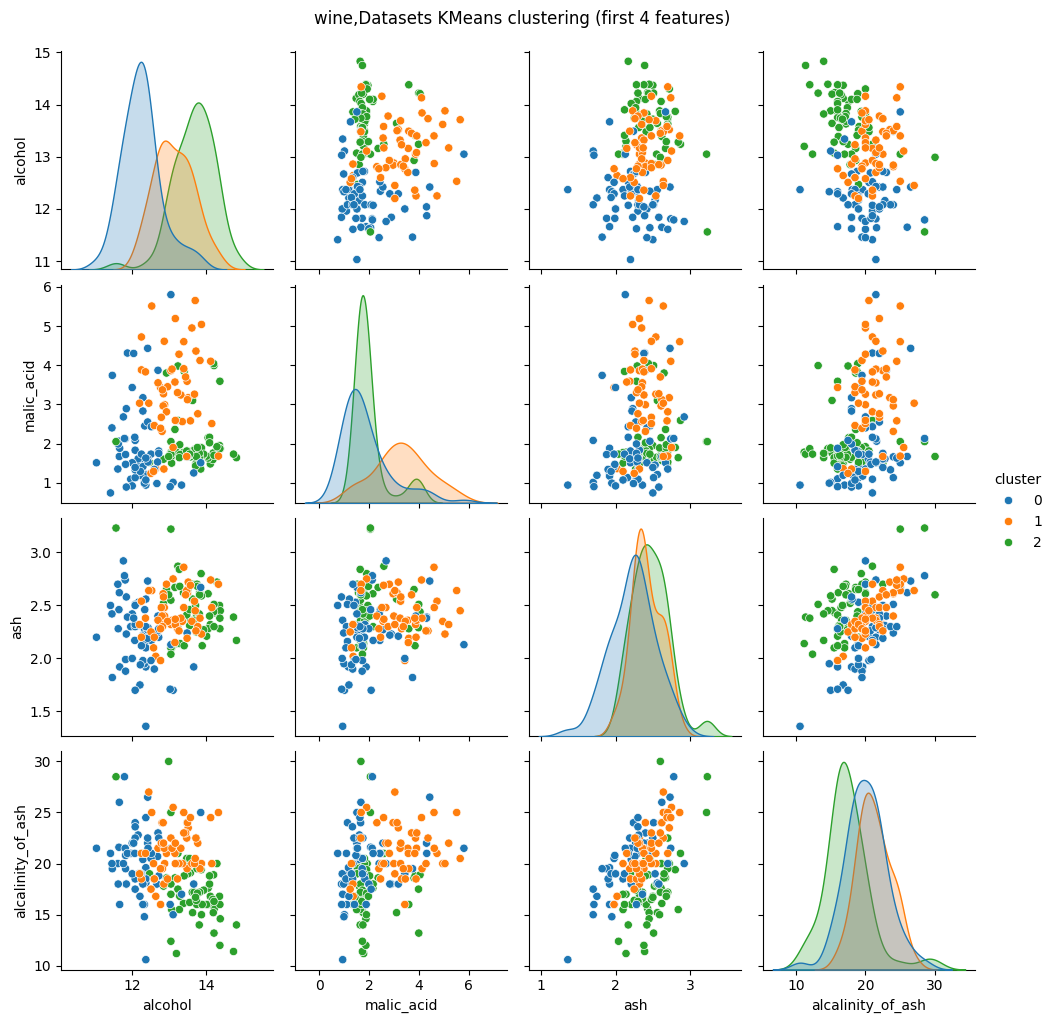

In [464]:
sns.pairplot(
    df,
    vars=feature_names[:4],
    hue='cluster',
    palette='tab10',
)
plt.suptitle("wine,Datasets KMeans clustering (first 4 features)",y=1.02)
plt.show()

24  Generate noisy blobs using make_blobs and use DBSCAN to identify both clusters and noise points. Print the
count

In [467]:
from sklearn.datasets import make_blobs
x,y=make_blobs(
    n_samples=1000,
    centers=4,
    cluster_std=2.0,
    random_state=42
)

In [469]:
x_scaled=StandardScaler().fit_transform(x)

In [505]:
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=0.2,min_samples=5)
labels=dbscan.fit_predict(x_scaled)

In [506]:
unique_labels=set(labels)

In [507]:
unique_labels

{np.int64(-1), np.int64(0), np.int64(1), np.int64(2)}

In [508]:
num_cluster=len(unique_labels-{-1})

In [509]:
num_cluster

3

In [510]:
num_noise=np.sum(labels==-1)

In [511]:
num_noise

np.int64(26)

In [514]:
print("Number of clusters:", num_cluster)
print("Number of noise points:", num_noise)

Number of clusters: 3
Number of noise points: 26
